In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.colors import LinearSegmentedColormap

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Step 1: Fetch the dataset
dataset = fetch_ucirepo(id=144)

# Step 2: Combine features and target into one DataFrame
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

# Step 3: Extract the metadata table
meta = dataset.variables  # contains name, description, type, etc.

# Step 4: Map coded column names to full descriptions
column_description_map = dict(zip(meta['name'], meta['description']))
df = df.rename(columns=column_description_map)
custom_renames = {
       'Status of existing checking account':'status_checking_account',
        'Duration':'duration_in_month',
         'Present employment since':'present_employment',        
         'Installment rate in percentage of disposable income':'installment_rate',
          'Personal status and sex':'gender_status',
           'Present residence since':'present_residence',
           'Other installment plans':'other_installment',
            'Number of existing credits at this bank':'existing_credits',
            'Job':'job_skill',
            'Number of people being liable to provide maintenance for':'number_of_dependents',
             '1 = Good, 2 = Bad':'score'

           }

# Apply renaming and lowercase to all column names
df = df.rename(columns={
    col: custom_renames.get(col, col).lower().replace(" ", "_")
    for col in df.columns
})
# Show column_names
df.columns






Index(['status_checking_account', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings_account/bonds',
       'present_employment', 'installment_rate', 'gender_status',
       'other_debtors_/_guarantors', 'present_residence', 'property', 'age',
       'other_installment', 'housing', 'existing_credits', 'job_skill',
       'number_of_dependents', 'telephone', 'foreign_worker', 'score'],
      dtype='object')

In [23]:
status_checking_map = {
    'A11': '< 0 DM', 'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary assignment',
    'A14': 'no checking account'
}

credit_history_map = {
    'A30': 'no credits/all paid', 'A31': 'all paid at this bank',
    'A32': 'current credits paid', 'A33': 'past delays',
    'A34': 'critical account'
}

purpose_map = {
    'A40': 'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment',
    'A43': 'radio/TV', 'A44': 'domestic appliances', 'A45': 'repairs',
    'A46': 'education', 'A47': 'vacation (not used?)', 'A48': 'retraining',
    'A49': 'business', 'A410': 'others'
}

savings_map = {
    'A61': '< 100 DM', 'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM', 'A64': '>= 1000 DM',
    'A65': 'unknown/no savings'
}

employment_map = {
    'A71': 'unemployed', 'A72': '< 1 year',
    'A73': '1 <= ... < 4 years', 'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

personal_status_map = {
    'A91': 'male : divorced/separated', 'A92': 'female : div/sep/married',
    'A93': 'male : single', 'A94': 'male : married/widowed',
    'A95': 'female : single'
}

other_debtors_map = {
    'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'
}

property_map = {
    'A121': 'real estate', 'A122': 'building savings/life insurance',
    'A123': 'car or other', 'A124': 'unknown/no property'
}

installment_plans_map = {
    'A141': 'bank', 'A142': 'stores', 'A143': 'none'
}

housing_map = {
    'A151': 'rent', 'A152': 'own', 'A153': 'for free'
}

job_map = {
    'A171': 'unemployed/unskilled non-resident',
    'A172': 'unskilled resident',
    'A173': 'skilled employee/official',
    'A174': 'management/self-employed/highly qualified'
}

telephone_map = {
    'A191': 'none', 'A192': 'yes, registered'
}

foreign_worker_map = {
    'A201': 'yes', 'A202': 'no'
}
decision_map={1:'good',2:'bad'}


In [24]:
df['status_checking_account'] = df['status_checking_account'].map(status_checking_map)
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account/bonds'] = df['savings_account/bonds'].map(savings_map)
df['present_employment'] = df['present_employment'].map(employment_map)
df['gender_status'] = df['gender_status'].map(personal_status_map)
df['other_debtors_/_guarantors'] = df['other_debtors_/_guarantors'].map(other_debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment'] = df['other_installment'].map(installment_plans_map)
df['housing'] = df['housing'].map(housing_map)
df['job_skill'] = df['job_skill'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)
df['score']=df['score'].map(decision_map)
df.head()
# Step 5: Save to CSV
df.to_csv("german_credit_data_descriptive.csv", index=False)

df.head()


,status_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account/bonds,present_employment,installment_rate,gender_status,other_debtors_/_guarantors,...,property,age,other_installment,housing,existing_credits,job_skill,number_of_dependents,telephone,foreign_worker,score
0,< 0 DM,6,critical account,radio/TV,1169,unknown/no savings,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,"yes, registered",yes,good
1,0 <= ... < 200 DM,48,current credits paid,radio/TV,5951,< 100 DM,1 <= ... < 4 years,2,female : div/sep/married,none,...,real estate,22,none,own,1,skilled employee/official,1,none,yes,bad
2,no checking account,12,critical account,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,< 0 DM,42,current credits paid,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building savings/life insurance,45,none,for free,1,skilled employee/official,2,none,yes,good
4,< 0 DM,24,past delays,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,none,yes,bad


In [7]:
bad_ratio = (
    df.groupby('purpose')['score']
    .apply(lambda x: (x == 'bad').sum() / len(x))
    .sort_values(ascending=False)
)
print(bad_ratio)

purpose
education              0.440000
others                 0.416667
car (new)              0.380342
repairs                0.363636
business               0.350515
domestic appliances    0.333333
furniture/equipment    0.320442
radio/TV               0.221429
car (used)             0.165049
retraining             0.111111
Name: score, dtype: float64


In [8]:
good_ratio= (
    df.groupby('purpose')['score']
    .apply(lambda x: (x == 'good').sum() / len(x))
    .sort_values(ascending=False)
)
print(good_ratio)

purpose
retraining             0.888889
car (used)             0.834951
radio/TV               0.778571
furniture/equipment    0.679558
domestic appliances    0.666667
business               0.649485
repairs                0.636364
car (new)              0.619658
others                 0.583333
education              0.560000
Name: score, dtype: float64


In [11]:
ratio_df = pd.DataFrame({
    'bad_ratio': bad_ratio,
    'good_ratio': good_ratio
})

print(ratio_df)

                     bad_ratio  good_ratio
purpose                                   
business              0.350515    0.649485
car (new)             0.380342    0.619658
car (used)            0.165049    0.834951
domestic appliances   0.333333    0.666667
education             0.440000    0.560000
furniture/equipment   0.320442    0.679558
others                0.416667    0.583333
radio/TV              0.221429    0.778571
repairs               0.363636    0.636364
retraining            0.111111    0.888889


In [9]:
bad_summary = df.groupby('purpose').agg(
    total_loans=('score', 'count'),
    bad_loans=('score', lambda x: (x == 'bad').sum()),
    bad_rate=('score', lambda x: (x == 'bad').mean())
).sort_values(by='bad_rate', ascending=False)

print(bad_summary)

                     total_loans  bad_loans  bad_rate
purpose                                              
education                     50         22  0.440000
others                        12          5  0.416667
car (new)                    234         89  0.380342
repairs                       22          8  0.363636
business                      97         34  0.350515
domestic appliances           12          4  0.333333
furniture/equipment          181         58  0.320442
radio/TV                     280         62  0.221429
car (used)                   103         17  0.165049
retraining                     9          1  0.111111


In [10]:
good_summary = df.groupby('purpose').agg(
    total_loans=('score', 'count'),
    good_loans=('score', lambda x: (x == 'good').sum()),
    good_rate=('score', lambda x: (x == 'good').mean())
).sort_values(by='good_rate', ascending=False)

print(good_summary)

                     total_loans  good_loans  good_rate
purpose                                                
retraining                     9           8   0.888889
car (used)                   103          86   0.834951
radio/TV                     280         218   0.778571
furniture/equipment          181         123   0.679558
domestic appliances           12           8   0.666667
business                      97          63   0.649485
repairs                       22          14   0.636364
car (new)                    234         145   0.619658
others                        12           7   0.583333
education                     50          28   0.560000


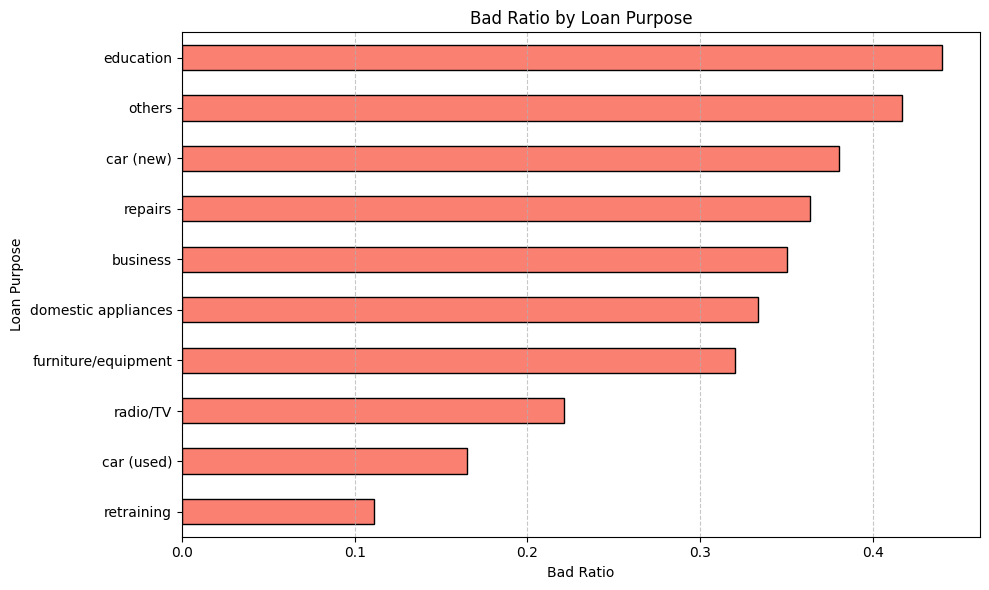

In [9]:


plt.figure(figsize=(10, 6))
bad_ratio.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Bad Ratio')
plt.ylabel('Loan Purpose')
plt.title('Bad Ratio by Loan Purpose')
plt.gca().invert_yaxis()  # Highest ratio at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


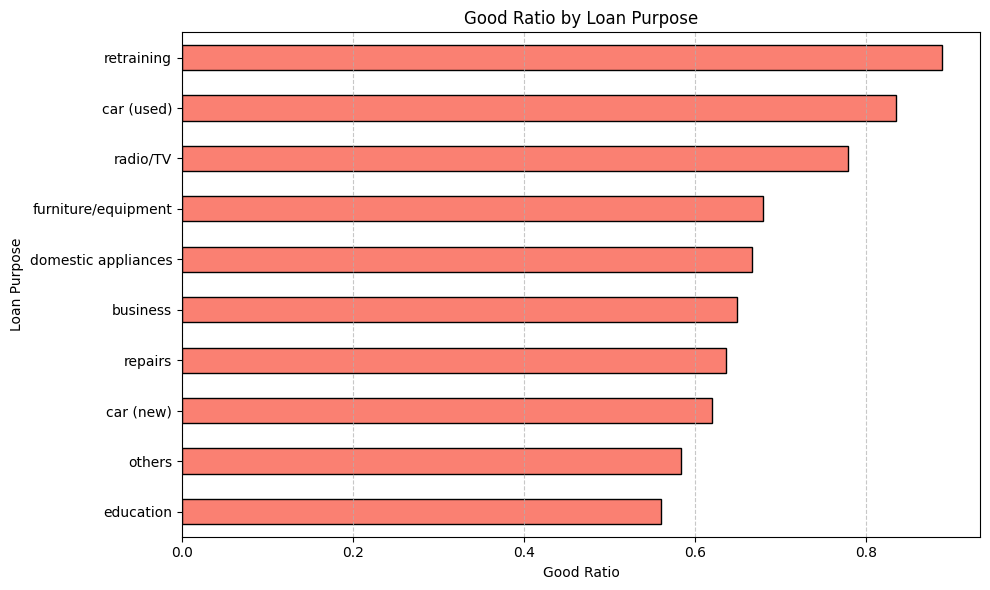

In [10]:

plt.figure(figsize=(10, 6))
good_ratio.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Good Ratio')
plt.ylabel('Loan Purpose')
plt.title('Good Ratio by Loan Purpose')
plt.gca().invert_yaxis()  # Highest ratio at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

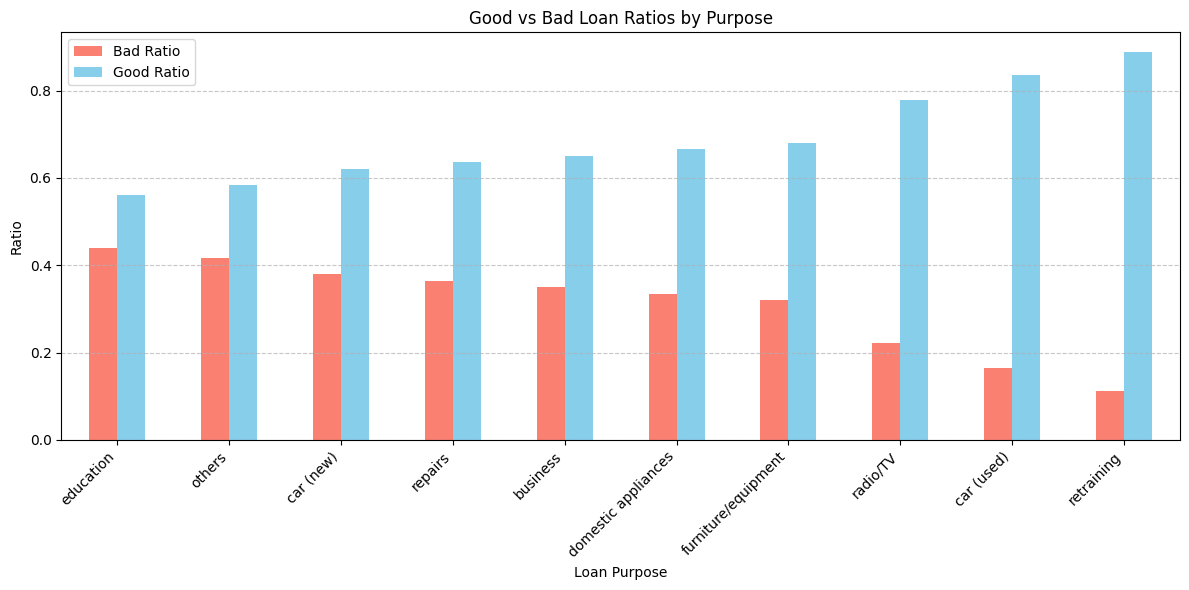

In [11]:
ratio_df = ratio_df.sort_values(by='bad_ratio', ascending=False)

ratio_df.plot(kind='bar', figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title('Good vs Bad Loan Ratios by Purpose')
plt.ylabel('Ratio')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45, ha='right')
plt.legend(['Bad Ratio', 'Good Ratio'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:

df['status_checking_account'] = df['status_checking_account'].str.lower().str.strip()
df['credit_history'] = df['credit_history'].str.lower().str.strip()


df['is_critical'] = df['credit_history'].str.contains('critical')


critical_summary = df.groupby('status_checking_account')['is_critical'].agg(
    total='count',
    critical_count='sum',
    critical_ratio=lambda x: x.sum() / len(x)
).sort_values(by='critical_ratio', ascending=False)

print(critical_summary)


                               total  critical_count  critical_ratio
status_checking_account                                             
no checking account              394             153        0.388325
>= 200 dm / salary assignment     63              18        0.285714
< 0 dm                           274              67        0.244526
0 <= ... < 200 dm                269              55        0.204461


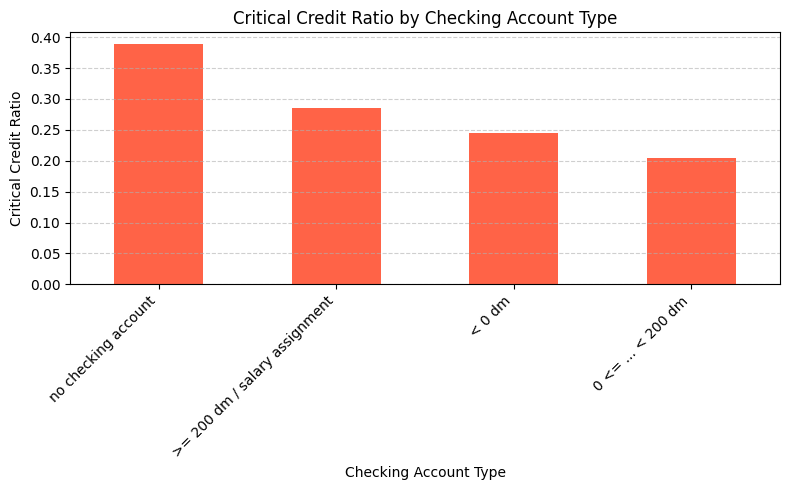

In [14]:
critical_summary['critical_ratio'].plot(kind='bar', figsize=(8, 5), color='tomato')
plt.title('Critical Credit Ratio by Checking Account Type')
plt.ylabel('Critical Credit Ratio')
plt.xlabel('Checking Account Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
